## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.1, 0.5, 0.95]
NESTEROV = [True, False]

In [7]:
results = {}
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Momentum = %.2f" % (momentum))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-{0}-{1}".format(momentum, nesterov)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with Momentum = 0.10
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
U

50000/50000 [==============================] - 8s 156us/step - loss: 1.6658 - acc: 0.4192 - val_loss: 1.6765 - val_acc: 0.4143
Epoch 49/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6623 - acc: 0.4197 - val_loss: 1.6726 - val_acc: 0.4174
Epoch 50/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6588 - acc: 0.4216 - val_loss: 1.6706 - val_acc: 0.4171
Experiment with Momentum = 0.10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None,

50000/50000 [==============================] - 7s 132us/step - loss: 1.6668 - acc: 0.4188 - val_loss: 1.6714 - val_acc: 0.4157
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6629 - acc: 0.4205 - val_loss: 1.6686 - val_acc: 0.4164
Experiment with Momentum = 0.50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)   

50000/50000 [==============================] - 7s 141us/step - loss: 1.5503 - acc: 0.4597 - val_loss: 1.5679 - val_acc: 0.4487
Experiment with Momentum = 0.50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.0129 - acc: 0.2859 - val_loss: 1.8520 - val_acc: 0.3485
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7915 - acc: 0.3732 - val_loss: 1.7518 - val_acc: 0.3801
Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7115 - acc: 0.4000 - val_loss: 1.6779 - val_acc: 0.4150
Epoch 4/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6550 - acc: 0.4217 - val_loss: 1.6432 - val_acc: 0.4196
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6092 - acc: 0.4364 - val_loss: 1.6042 - val_acc: 0.4365
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5711 - acc: 0.4495 - val_loss: 1.5681 - val_acc: 0.4492
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5380 - acc: 0.4620 - val_loss: 1.5346 - 

Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7991 - acc: 0.3639 - val_loss: 1.7608 - val_acc: 0.3811
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7235 - acc: 0.3917 - val_loss: 1.6916 - val_acc: 0.4052- ETA: 1s - lo
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6665 - acc: 0.4132 - val_loss: 1.6424 - val_acc: 0.4144
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6211 - acc: 0.4291 - val_loss: 1.6124 - val_acc: 0.4300
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5837 - acc: 0.4400 - val_loss: 1.5774 - val_acc: 0.4369
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5539 - acc: 0.4537 - val_loss: 1.5605 - val_acc: 0.4476
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5337 - acc: 0.4615 - val_loss: 1.5720 - val_acc: 0.4410
Epoch 9/50
50000/500

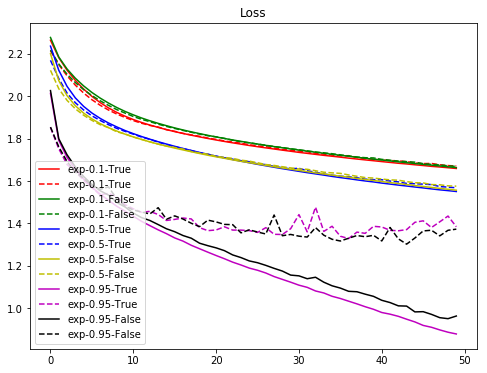

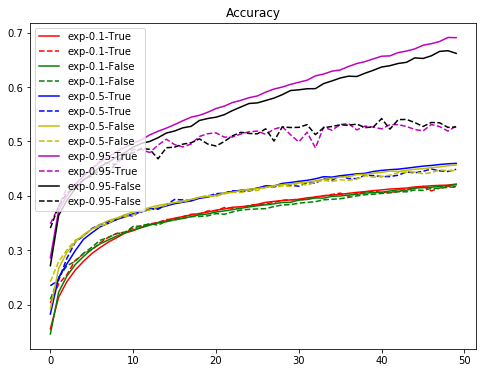

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()